#**Relatorio Final**

Participantes:

* -> João Pedro Viana
* -> Luiz Alberto Rezende Costa
* -> Kaio Wellinghton Batista e Silva





#Introdução

Este relatório de análise de dados se concentra em um conjunto de dados que examina o estresse, ansiedade e depressão entre estudantes. O objetivo é identificar tendências e relações que possam ajudar a entender melhor o impacto desses fatores na vida acadêmica dos alunos. Ao explorar este conjunto de dados, buscamos fornecer insights relevantes para aprimorar o suporte à saúde mental dos estudantes e, assim, contribuir para um ambiente de aprendizagem mais saudável e produtivo.


---



* Stress_Level: The level of stress experienced by the individual.             Varia de [0 - 5]

* Depression_Score: The score representing the level of depression experienced by the individual.                         Varia de [0 - 5]

* Anxiety_Score: The score representing the level of anxiety experienced by the individual.                               Varia de [0 - 5]

* Sleep_Quality: The quality of sleep experienced by the individual .                                                     Varia de [0 - 2]

* Physical_Activity: The level of physical activity .                                                                     Varia de [0 - 2]

* Substance_Use: The frequency of substance use such as alcohol, cigarettes or other drugs.                               Varia de [0 - 2]

* Financial_Stress: The level of financial stress experienced by the individual Varia de [0 - 5]

* Semester_Credit_Load: The number of credits the individual is taking in the semester [15 - 30]

* Relationship_Status: Varia de [0 - 1]

* Age: Varia de [18 - 35]

* CGPA: Varia de [2.44 - 4.0]

* [Fonte dos dados](https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments?resource=download)

#Pré-Processamento

In [ ]:
#Primeira visualização dos dados

#Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dados_bruto = pd.read_csv("/content/students_mental_health_survey.csv")
dados_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [ ]:
dados_bruto.isna().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

Visto que há poucos dados com problemas envolvendo NaN, foi de nossa escolha apenas elimina-los, ja que nao iria afetar em larga escala a análise dos mesmos.

In [ ]:
dados = dados_bruto.dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

Após isso definimos algumas variaveis para auxiliarr na decorrência dass análises

In [ ]:
stress = "Stress_Level"
depre = "Depression_Score"
ansiedade = "Anxiety_Score"
social = "Social_Support"
sono = "Sleep_Quality"
diet = "Diet_Quality"
relac = "Relationship_Status"
subs = "Substance_Use"
creditos = "Semester_Credit_Load"
curso ="Course"
casa = "Residence_Type"
aconselhamento = "Counseling_Service_Use"
atvdd_fisica = 'Physical_Activity'

In [ ]:
dados.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus


Passando valores numéricos para colunas qualitativas

In [ ]:
cont = 2
for x in dados[sono].unique():
  dados[sono] = dados[sono].replace(x, cont)
  cont -= 1
dados[sono].unique()

# Low - 0
# Medium - 1
# High - 2


cont = 0
for x in dados[aconselhamento].unique():
  dados[aconselhamento] = dados[aconselhamento].replace(x, cont)
  cont += 1
dados[aconselhamento].unique()

# Low - 0
# Medium - 1
# High - 2

cont = 0
for x in ['Low','Moderate','High']:
  dados[atvdd_fisica] = dados[atvdd_fisica].replace(x, cont)
  cont += 1
dados[atvdd_fisica].unique()

# Low - 0
# Medium - 1
# High - 2


<ipython-input-7-e86c919a277c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-e86c919a277c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-e86c919a277c>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([1, 0, 2])

#Perguntas

**P1: Qualidade de Sono e Nivel de estresse são inversamente proporcionais ??**

Para responder essa pergunta, pegamos para cada curso o nivel de correlação entre ambas as variáveis

In [ ]:
print("Correlação entre Qualidade de sono e Nivel de estresse:")
for c in dados[curso].unique():
  print(f'Para o curso {c}: {dados[(dados[curso] == c)][[stress, sono]].corr()[sono][0]:.3f}')

Correlação entre Qualidade de sono e Nivel de estresse:
Para o curso Others: -0.065
Para o curso Engineering: 0.008
Para o curso Business: 0.069
Para o curso Medical: -0.007
Para o curso Law: 0.005
Para o curso Computer Science: 0.006


Visto que o resultado foi muito nivelado, pela curiosidade plotamos um grafico de linha entre nivel de sono e estresse de acordo com o CGPA

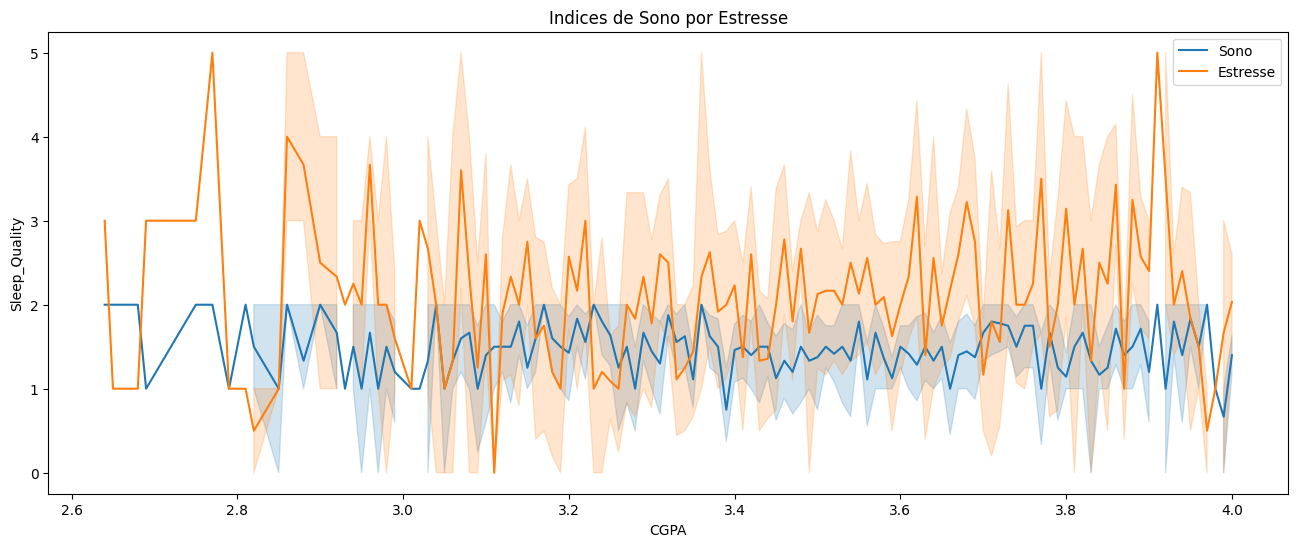

In [ ]:
plt.figure(figsize=(16, 6))

sns.lineplot(data=dados[(dados[curso] == "Business")], x='CGPA', y=sono, label='Sono')
sns.lineplot(data=dados[(dados[curso] == "Business")], x='CGPA', y=stress, label='Estresse')


plt.title('Indices de Sono por Estresse')
plt.show()

*Visto o grafico, realmente é dificil por uma relação entre ambas*

**P2: Há uma diferença nos niveis de ansiedade entre alunos que usam serviços de aconselhamento e alunos que não usam ??**

Para resolver essa pergunta, escrevemos uma tabela contendo a média de ansiedade de cada curso de acordo com os níveis de aconselhamento da escola

In [ ]:
resultados = []

for c in dados[curso].unique():
    curso_data = dados[dados[curso] == c]

    media_sem_aconselhamento = curso_data[curso_data[aconselhamento] == 0][ansiedade].mean()
    media_fraco_aconselhamento = curso_data[curso_data[aconselhamento] == 1][ansiedade].mean()
    media_forte_aconselhamento = curso_data[curso_data[aconselhamento] == 2][ansiedade].mean()

    resultados.append({
        'Curso': c,
        'Média sem aconselhamento': f'{media_sem_aconselhamento:.2f}',
        'Média com aconselhamento fraco': f'{media_fraco_aconselhamento:.2f}',
        'Média com aconselhamento forte': f'{media_forte_aconselhamento:.2f}'
    })

df_resultados = pd.DataFrame(resultados)
df_resultados


,Curso,Média sem aconselhamento,Média com aconselhamento fraco,Média com aconselhamento forte
0,Others,2.05,2.17,2.34
1,Engineering,2.06,2.15,1.90
2,Business,2.02,2.09,1.93
3,Medical,2.08,2.12,1.96
4,Law,3.24,3.22,3.22
5,Computer Science,2.04,2.05,2.08


*Não necesssariamente*



**P3: Qual é o impacto das atividades físicas na depressão dos estudantes ??**

In [ ]:
resultados = []

for c in dados[curso].unique():
    curso_data = dados[dados[curso] == c]

    media_sem_atividade = curso_data[curso_data[atvdd_fisica] == 0][depre].mean()
    media_pouca_atividade = curso_data[curso_data[atvdd_fisica] == 1][depre].mean()
    media_muita_atividade = curso_data[curso_data[atvdd_fisica] == 2][depre].mean()

    resultados.append({
        'Curso': c,
        'Média sem atividade física': f'{media_sem_atividade:.2f}',
        'Média com pouca atividade física': f'{media_pouca_atividade:.2f}',
        'Média com muita atividade física': f'{media_muita_atividade:.2f}'
    })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Curso,Média sem atividade física,Média com pouca atividade física,Média com muita atividade física
0,Others,2.03,2.05,2.21
1,Engineering,2.02,2.13,2.08
2,Business,2.28,2.01,2.09
3,Medical,2.00,2.07,2.03
4,Law,2.05,2.07,2.25
5,Computer Science,3.26,3.40,3.13


*Novamente, resultados inconclusivos*

#Outras perguntas atrás de resultados mais satisfatórios:

Fizemos esse esquema para poder analisar a inersia do modelo Kmeans em cada numero de clusters de 1-11 em busca do "Joelho do grafico", como foi explicado em sala

KMeans(n_clusters=2, n_init='auto', random_state=0)

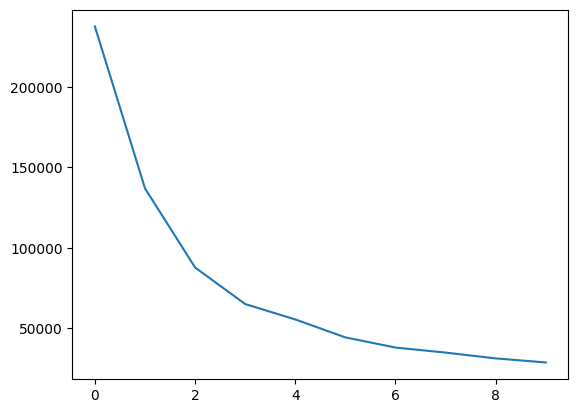

In [ ]:
teste = dados[["Age","Semester_Credit_Load","CGPA"]] # Nomes das colunas para poder gerar o teste

lista=[]
for x in range(1,11):

  kmeans = KMeans(n_clusters = x, random_state = 0, n_init='auto')
  kmeans.fit(teste)

  lista.append(kmeans.inertia_)

sns.lineplot(lista)

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto') #Numero de clusters
kmeans.fit(teste)


Definidas as variáveis, podemos gerar gráficos para mostrar como se deu o agrupamento

In [ ]:
Scene = dict(xaxis = dict(title  = teste.columns[0]),yaxis = dict(title  = teste.columns[1]),zaxis = dict(title  = teste.columns[2]))


labels = kmeans.labels_
trace = go.Scatter3d(x=teste[teste.columns[0]], y=teste[teste.columns[1]], z=teste[teste.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()

Neste caso, o agrupamento se deu claramente pelo nivel de Crédito por semestre

In [ ]:
teste = dados[["CGPA", "Age", stress]] # Nomes das colunas para poder gerar o teste


kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto') #Numero de clusters
kmeans.fit(teste)

Scene = dict(xaxis = dict(title  = teste.columns[0]),yaxis = dict(title  = teste.columns[1]),zaxis = dict(title  = teste.columns[2]))


labels = kmeans.labels_
trace = go.Scatter3d(x=teste[teste.columns[0]], y=teste[teste.columns[1]], z=teste[teste.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()

In [ ]:
teste = dados[["CGPA", depre, stress]] # Nomes das colunas para poder gerar o teste


kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto') #Numero de clusters
kmeans.fit(teste)

Scene = dict(xaxis = dict(title  = teste.columns[0]),yaxis = dict(title  = teste.columns[1]),zaxis = dict(title  = teste.columns[2]))


labels = kmeans.labels_
trace = go.Scatter3d(x=teste[teste.columns[0]], y=teste[teste.columns[1]], z=teste[teste.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()

In [ ]:
teste = dados[[ansiedade, depre, stress]] # Nomes das colunas para poder gerar o teste


kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') #Numero de clusters
kmeans.fit(teste)

Scene = dict(xaxis = dict(title  = teste.columns[0]),yaxis = dict(title  = teste.columns[1]),zaxis = dict(title  = teste.columns[2]))


labels = kmeans.labels_
trace = go.Scatter3d(x=teste[teste.columns[0]], y=teste[teste.columns[1]], z=teste[teste.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()

#Conclusão

Depois de analisar os dados, infelizmente não conseguimos encontrar uma resposta clara e definitiva para as seguintes perguntas:

* Será que a qualidade do sono e o nível de estresse têm uma relação oposta?  
* Existe alguma diferença nos níveis de ansiedade entre estudantes que recebem aconselhamento e aqueles que não?
* Há um impacto na depresssão dos estudantes em relação a prática de exercícios ?


A análise mostrou que muitos fatores podem afetar essas relações. Por exemplo, a relação entre qualidade do sono e estresse não é simplesmente uma linha reta, porque muitas coisas diferentes, além do estresse, podem influenciar como bem dormimos. Da mesma forma, entender como o aconselhamento afeta a ansiedade e a depressão é complicado, e nossos dados podem não capturar todos os detalhes.

Isso nos lembra que o bem-estar dos estudantes é uma questão muito complexa e que precisamos considerar muitos fatores ao tentar entender essas questões. Às vezes, as respostas não são fáceis de encontrar, e é por isso que a pesquisa e a coleta de mais informações são tão importantes. A análise de dados é uma ferramenta poderosa, mas nem sempre é capaz de responder a todas as nossas perguntas de maneira simples.



1.   Limitações:


> Os tipos dos dados utilizados nas colunas eram mais qualitativos que quantitativos, isso impacta na geração dos graficos visto que não há amplitude entre os valores definidos, oque dificulta uma analise mais aprofundada.

2.   Melhorias


> Buscar mais datasets com o mesmo objetivo visando ter mais conteudo para analisar e manipular, visto que a escassez de dados também foi uma limitação implicada.

3. Trabalhos Futuross

> Futuramente, esses dados podem ser vistos e re-analizados em busca de melhorar o sistema educacional global, visto que depressão, ansiedade e Estresse sao problemas fixos na vida estudantil

